## Contents
- Bar chart orders day of the week
- Histogram prices
- Line chart orders day of the week and prices
- Histogram order hour of the day
- Bar chart loyalty flag
- Line chart prices hour of the day
- Line chart age n_dependants
- Scatterplot age prices

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\4.0 Python\Instacart Basket Analysis"

### Import data

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust(4.9 P1).pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,product_name,aisle_id,...,order_freq_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,Soda,77,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,Soda,77,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,Soda,77,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,Soda,77,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,Soda,77,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Bar Chart

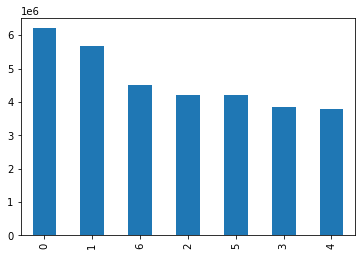

In [5]:
bar = df['orders_day_of_the_week'].value_counts().plot.bar()

### Histogram

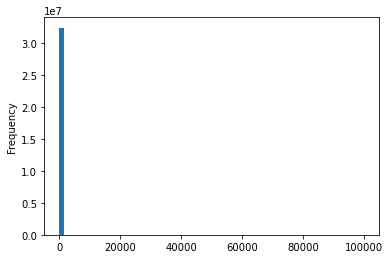

In [6]:
hist = df['prices'].plot.hist(bins = 70)

In [7]:
df['prices'].max()

99999

In the exercise, we saw that outliers (prices > 100) caused the one large column in the histogram. I will replace outlier values with nan

In [8]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

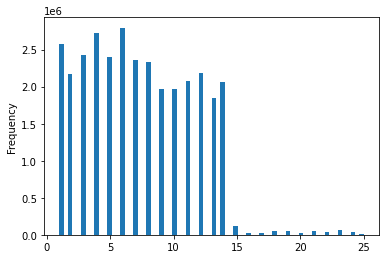

In [9]:
hist_2 = df['prices'].plot.hist(bins=70)

### Line chart

#### Sampling  
I will take a random sample of 30% of the data

In [10]:
# setting random seed
np.random.seed(4)

In [11]:
# list storing boolean values
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# split df in to two samples
big = df[dev]

In [13]:
small = df[~dev]

In [14]:
# double checking big and small contain all data
len(df)

32404859

In [15]:
len(big) + len(small)

32404859

#### Line Chart

In [16]:
# creating smaller df to speed up processing
df_2 = small[['orders_day_of_the_week', 'prices']]

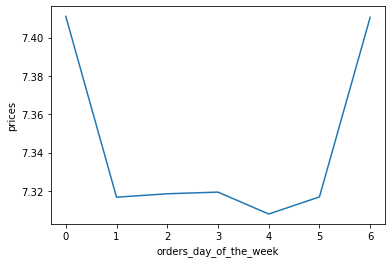

In [17]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

### Q3 Histogram: order_hour_of_day

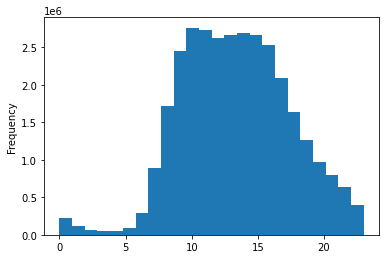

In [22]:
hist_3 = df['order_hour_of_day'].plot.hist(bins = 24)

This histogram tells us that the majority of orders are placed during the middle of the day.

### Q4 Bar chart: loyalty_flag

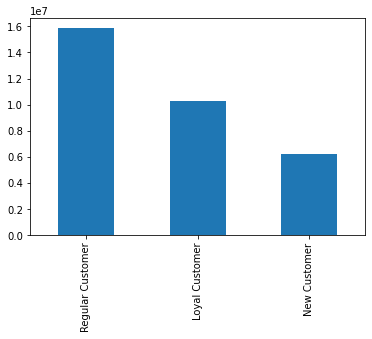

In [25]:
bar_2 = df['loyalty_flag'].value_counts().plot.bar()

### Q5 Line chart: prices/hour of day

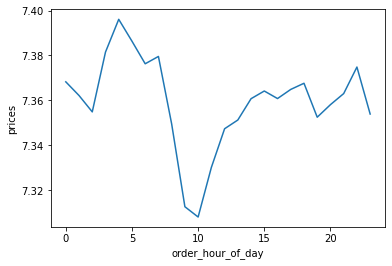

In [26]:
line_2 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

### Q6 Line chart: Age/N_Dependants

In [28]:
# creating smaller df to speed up processing
df_3 = df[['age', 'n_dependants']]

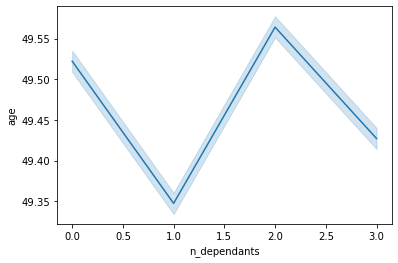

In [29]:
line_3 = sns.lineplot(data = df_3, x = 'n_dependants', y = 'age')

In [32]:
df['age'].mean()

49.465269853511785

The linechart shows the average number of dependants for customers who are the average age (49.47) for instacart. 

### Q7 Scatterplot: Age/Prices

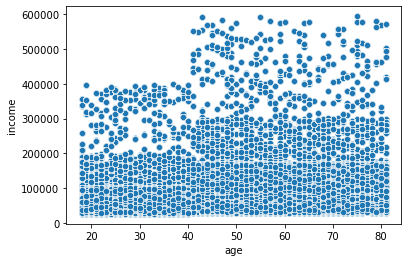

In [34]:
scatter = sns.scatterplot(data = df, x = 'age', y = 'income')

This scatterplot shows there is a slight positive correlation between spending power (income) and age. 

### Q8 Exporting visualizations

In [35]:
#orders_day_of_week bar
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_bar.png'))

In [36]:
# prices histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_hist.png'))

In [37]:
# day_of_week_prices linechart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_price_line.png'))

In [38]:
# order_hour histogram
hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_hist.png'))

In [39]:
# loyalty_flag bar
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

In [40]:
# order_hour_prices linechart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

In [41]:
# dependants_age linechart
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_age_line.png'))

In [42]:
# age_income scatter
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))